<a href="https://colab.research.google.com/github/DevSehgal/deep-learning-fastai-pytorch/blob/main/Fastai_notebook_based_on_chapter_5_notes_and_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 15.5MB/s 
     |████████████████████████████████| 1.1MB 52.0MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 194kB 53.7MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *

#Download data
path = untar_data(URLs.PETS)

Create a model for breed classification as a baseline and then go on improving that

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/pug_189.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_110.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_52.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_70.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_23.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_53.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_60.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_254.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_51.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_171.jpg')...]

In [6]:
(path/"images").ls()[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/pug_189.jpg')

In [8]:
fname = (path/"images").ls()[1]
re.findall(r'(.+)_\d+.jpg$', fname.name)

['newfoundland']

In [9]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(224)
#                ,batch_tfms=aug_transforms(size=224, min_scale=0.75)
                 )
dls = pets.dataloaders(path/"images")

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.453992,0.338775,0.107578,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.437564,0.351788,0.118403,00:57
1,0.301850,0.286062,0.089310,00:57
2,0.160543,0.238094,0.066306,00:58
3,0.094470,0.229762,0.066306,00:58


In [11]:
pets2 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460)
                 ,batch_tfms=aug_transforms(size=224, min_scale=0.75)
                 )
dls2 = pets2.dataloaders(path/"images")

In [12]:
learn2 = cnn_learner(dls2, resnet34, metrics=error_rate)
learn2.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.533671,0.326018,0.106901,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.501677,0.288233,0.090663,01:15
1,0.390575,0.252976,0.085250,01:14
2,0.234932,0.205520,0.062246,01:14
3,0.160471,0.196829,0.064953,01:14


In [13]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Persian_55.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x486
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Persian_55.jpg
    applying partial gives
      Persian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=500x486, TensorCategory(7))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline:

In [14]:
pets2.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Persian_55.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x486
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Persian_55.jpg
    applying partial gives
      Persian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=500x486, TensorCategory(7))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline:

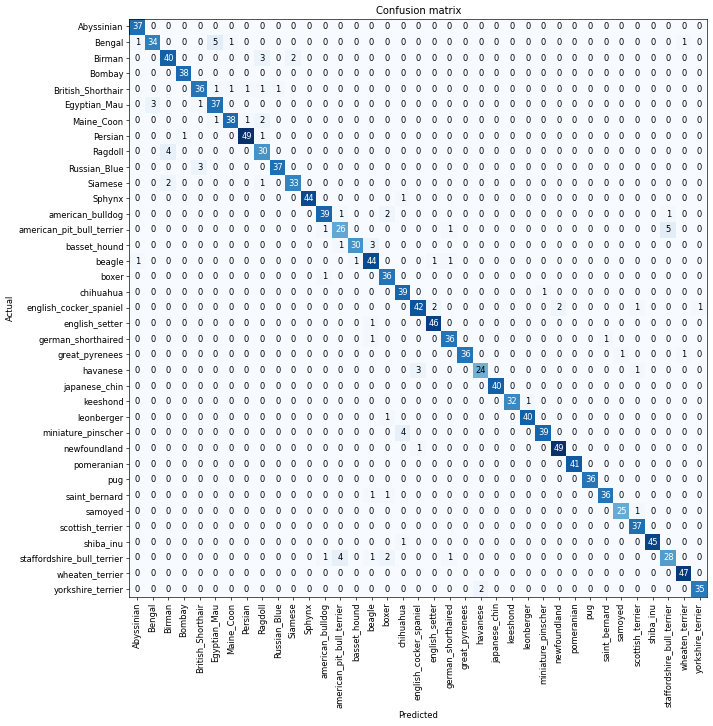

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Bengal', 'Egyptian_Mau', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

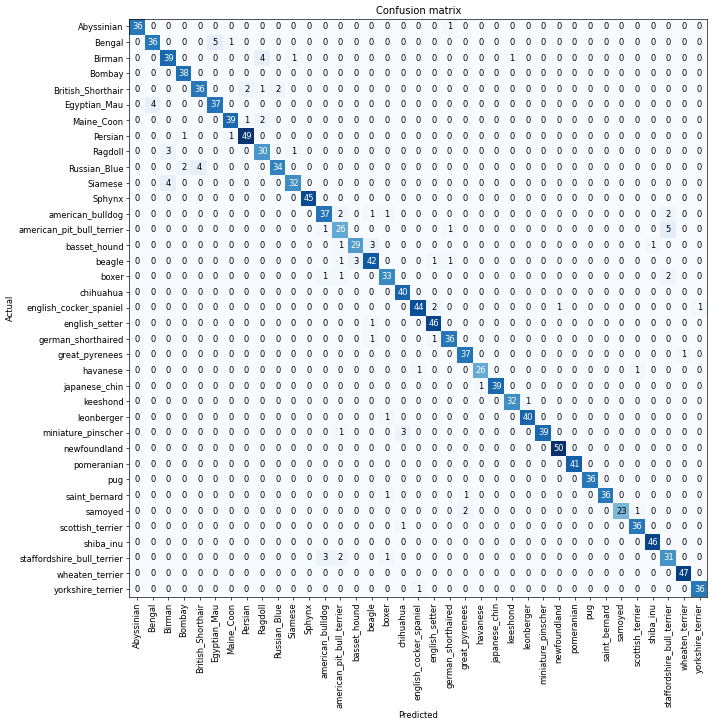

In [ ]:
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp2.most_confused(min_val=5)

[('Bengal', 'Egyptian_Mau', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

In [ ]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [ ]:
learn2.loss_func

FlattenedLoss of CrossEntropyLoss()

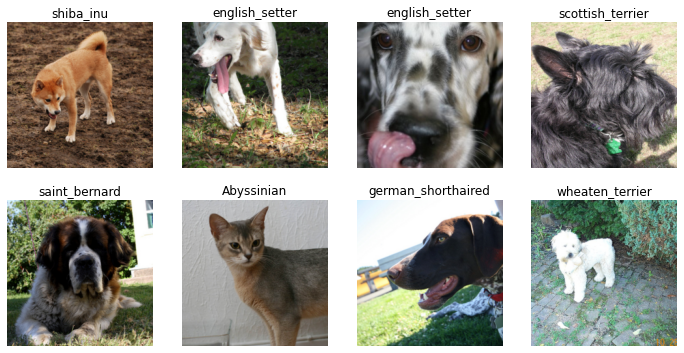

In [20]:
dls.show_batch(nrows=2, ncols=4)